## Data processing

In [1]:
import pandas as pd
import itertools

In [1]:
# Read in CSV files
agg_results = pd.read_csv('../aggregated_results.csv')
gene_essentiality = pd.read_csv('../CRISPRGeneEffect.csv')
model_id = pd.read_csv('Model.csv')

In [2]:
ecDNA_ids = set(agg_results.groupby("Sample name").apply(lambda group: (group["Classification"] == "ecDNA").any()).loc[lambda x: x].index)
non_ecDNA_ids = set(agg_results.groupby('Sample name').apply(lambda group: not (group["Classification"] == "ecDNA").any()).loc[lambda x: x].index)

In [3]:
only_ecDNA = agg_results[agg_results['Sample name'].isin(ecDNA_ids)]
only_non_ecDNA = agg_results[agg_results['Sample name'].isin(non_ecDNA_ids)]

In [4]:
import ast
ec_dna_genes = only_ecDNA['All genes'].tolist()
ec_dna_genes = [ast.literal_eval(g) for g in ec_dna_genes]
ec_dna_genes = [item for sublist in ec_dna_genes for item in sublist]
ec_dna_genes = set(ec_dna_genes)

non_ec_dna_genes = only_non_ecDNA['All genes'].tolist()
non_ec_dna_genes = [ast.literal_eval(g) for g in non_ec_dna_genes]
non_ec_dna_genes = [item for sublist in non_ec_dna_genes for item in sublist]
non_ec_dna_genes = set(non_ec_dna_genes)


In [5]:
# We replace the cell line names in CRISPRGeneEffect.csv with the corresponding CCLE names from Models.csv

for index, row in gene_essentiality.iterrows():
    id = row['Unnamed: 0']
    name = model_id.loc[model_id["ModelID"] == id, "CCLEName"].values[0]
    gene_essentiality.at[index, 'Unnamed: 0'] = name

# We rename columns to only include the gene names (no integers or parentheses, etc.)
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'\(\d+\)', '', regex=True)  # Remove integers within parentheses
    df.columns = df.columns.str.replace(r'\(\)', '', regex=True)     # Remove empty parentheses, if any
    df.columns = df.columns.str.strip()                              # Remove leading/trailing whitespaces
    return df

gene_essentiality = clean_column_names(gene_essentiality)

In [6]:
gene_essentiality

,Unnamed: 0,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,NIHOVCAR3_OVARY,-0.122637,0.025881,0.034217,-0.128082,-0.031285,0.338046,-0.006439,-0.093642,0.189186,...,-0.131727,-0.039829,0.179405,0.283552,0.204513,-0.289724,-0.062972,0.074180,0.111244,-0.467908
1,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.019756,-0.083640,-0.060118,-0.027417,-0.036116,-0.001056,0.312876,-0.086897,0.204434,...,-0.170329,-0.454263,0.194583,0.098989,0.126948,0.032983,-0.410392,0.113156,0.234388,-0.088306
2,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.107208,-0.023211,0.200204,0.116039,-0.172227,-0.071294,0.203270,-0.127806,-0.090981,...,-0.301695,-0.454969,-0.061959,-0.036427,0.016602,-0.201273,-0.178877,-0.055349,-0.002161,-0.186842
3,LS513_LARGE_INTESTINE,-0.031027,-0.137850,0.067704,0.107988,0.007992,0.124945,0.049548,-0.220824,-0.165669,...,-0.303390,-0.507272,-0.025400,0.236659,0.072010,-0.100344,-0.462160,-0.001555,-0.325964,-0.486660
4,C2BBE1_LARGE_INTESTINE,0.008888,-0.146566,0.084471,0.089419,0.065109,0.027841,0.087943,-0.161369,0.041121,...,-0.255466,-0.288739,-0.037132,0.261444,-0.062391,-0.112703,-0.598698,0.095877,-0.026742,-0.320759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,PSS131R_Osteosarcoma,-0.055721,-0.121228,0.072790,0.021916,-0.221940,0.071135,0.134854,-0.504790,0.058356,...,-0.104959,-0.559438,-0.062461,-0.058814,-0.076221,0.024959,0.015259,-0.306562,-0.148368,-0.579576
1096,YUHOIN0650_Melanoma_Skin,-0.009973,-0.119813,0.044097,0.041358,-0.146565,0.160566,0.134247,-0.242759,-0.085035,...,-0.314751,-0.903238,0.104278,0.101270,0.026373,-0.119911,-0.289412,-0.195097,-0.206400,-0.486525
1097,SKNMM_BRAIN_BONE,-0.025991,-0.007706,-0.038468,0.236576,-0.239690,0.061611,0.128461,-0.498119,0.022097,...,-0.164150,-0.743401,-0.023401,0.174912,-0.230089,-0.079342,-0.347484,-0.085302,-0.095965,-0.346272
1098,NaN,-0.127639,-0.040705,0.134556,-0.047984,-0.116114,0.213144,0.198647,-0.183355,-0.004409,...,-0.275523,-0.898982,-0.050201,0.125480,-0.189114,-0.043555,-0.335270,-0.208063,-0.094741,-0.222404


In [7]:
ecDNA_dict = {}

for gene in ec_dna_genes:
    if gene not in gene_essentiality.columns:
        continue
    if gene not in ecDNA_dict:
        ecDNA_dict[gene] = []
    for id in ecDNA_ids:
        if id not in gene_essentiality['Unnamed: 0'].values:
            continue
        val = gene_essentiality.loc[gene_essentiality['Unnamed: 0'] == id][gene].values[0]
        if val is None:
            continue
        ecDNA_dict[gene].append(val)
    

In [8]:
df_ecDNA = pd.DataFrame.from_dict(ecDNA_dict)
df_ecDNA

,OR2V1,RUBCN,CORO6,RNF43,ANXA9,PELI2,NODAL,YIF1B,EPG5,COCH,...,LCE3A,UBAP2L,SNTB1,ZW10,DUSP5,ATP4A,PLEKHB1,AASDHPPT,YTHDF1,MYOC
0,-0.205255,0.097452,-0.377157,0.250371,0.020490,0.111409,0.060456,-0.084292,-0.015678,-0.542506,...,-0.298919,-0.415112,0.178977,-0.144937,0.143028,-0.247571,-0.049346,-0.519142,0.169011,0.016245
1,-0.045160,0.036134,-0.314927,0.052105,0.028202,-0.014197,-0.026690,-0.047060,-0.023612,-0.103705,...,-0.323999,-0.917998,0.105619,-0.482286,-0.015704,-0.028736,-0.117416,-0.307868,0.020777,-0.016369
2,0.018949,0.047636,-0.431924,-0.076380,-0.149836,-0.013996,-0.009291,0.024023,-0.207712,-0.250736,...,-0.135521,-0.308753,0.050703,-0.013179,-0.055412,-0.130907,-0.085495,-0.493706,0.111608,-0.016337
3,-0.339564,0.134444,-0.809510,-0.007565,-0.307619,0.010347,-0.202746,-0.096051,-0.181871,-0.312845,...,-0.324823,-0.352099,0.011579,-0.113774,-0.082513,-0.010227,-0.582295,-0.524487,0.195350,0.097515
4,-0.199809,0.378500,-0.272085,0.003574,-0.041541,0.026187,-0.064800,0.047761,-0.049220,-0.033900,...,-0.151065,-0.088276,-0.112221,-0.259390,-0.145004,0.048702,0.078074,-0.160840,0.483390,0.008874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,-0.186454,0.046925,-0.500018,-0.037126,-0.201659,-0.221617,-0.240175,0.031393,-0.344301,0.057083,...,-0.203856,-0.226069,-0.032427,-0.030686,0.022185,-0.036398,-0.363053,-0.090440,0.171280,0.170289
115,NaN,-0.055530,-0.424624,0.271644,0.064890,-0.225358,-0.177645,-0.108566,-0.421347,-0.123701,...,-0.194565,-0.379139,0.023297,-0.271610,0.190046,-0.056769,-0.363479,-0.100162,0.292736,0.094586
116,NaN,0.099240,-0.329638,-0.024833,-0.102810,-0.024923,0.047139,0.001665,-0.089111,0.119348,...,0.051620,-0.489749,-0.037088,-0.341573,-0.117557,-0.133658,-0.016593,-0.202559,-0.057174,0.103650
117,0.079207,-0.036059,-0.418294,0.253740,-0.344321,-0.077228,-0.101883,-0.160882,-0.196860,-0.115553,...,-0.227625,-0.170478,-0.036029,-0.057797,0.248674,0.205524,-0.021882,-0.431069,0.136802,-0.098334


In [9]:
non_ecDNA_dict = {}

for gene in non_ec_dna_genes:
    if gene not in gene_essentiality.columns:
        continue
    if gene not in non_ecDNA_dict:
        non_ecDNA_dict[gene] = []
    for id in non_ecDNA_ids:
        if id not in gene_essentiality['Unnamed: 0'].values:
            continue
        val = gene_essentiality.loc[gene_essentiality['Unnamed: 0'] == id][gene].values[0]
        if val is None:
            continue
        non_ecDNA_dict[gene].append(val)
    

In [10]:
df_non_ecDNA = pd.DataFrame.from_dict(non_ecDNA_dict)

In [11]:
df_non_ecDNA

,RUBCN,ANXA9,DHCR7,MRPS12,MTERF1,TSHZ3,GPR68,TECPR1,ZKSCAN1,CCT8,...,EBNA1BP2,ATP4A,GRAMD1A,PLEKHB1,CNPY4,ZNF786,CRYBB1,SLC38A1,MAML1,NKX1-2
0,0.138015,-0.146906,-0.371142,-0.224968,0.128560,0.047233,0.162513,-0.048428,-0.073134,-1.817219,...,-0.929095,0.045164,0.050692,-0.127384,-0.113432,-0.068422,-0.064924,-0.216265,-0.142246,0.067845
1,-0.022860,-0.187139,-0.150242,-0.656908,-0.246252,0.159285,0.196088,0.027615,0.224483,-2.315949,...,-0.828420,-0.039339,-0.010954,0.030779,-0.052901,-0.230257,0.116072,-0.299971,-0.411127,-0.139136
2,0.234840,-0.327381,-0.012514,-0.997653,-0.004739,0.176815,-0.034088,0.052755,-0.011733,-1.933177,...,-0.852816,0.127634,0.183954,0.009242,-0.157617,0.100215,0.195138,-0.337305,-0.000746,0.058762
3,0.211407,-0.174456,-0.025166,-0.178271,-0.074222,0.271644,0.164456,0.033060,-0.011051,-1.401105,...,-0.772229,-0.007230,-0.126537,0.067442,0.050676,0.165386,-0.139964,-0.093943,-0.247095,-0.347141
4,0.038473,-0.309818,-0.066809,-0.352641,-0.067477,0.167069,0.142246,0.067159,0.161356,-1.411472,...,-0.973978,-0.018687,0.062754,-0.084630,-0.181606,0.021169,0.056933,-0.210507,0.139232,0.045971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.089894,-0.183696,-0.105210,-0.863436,-0.047396,-0.038639,0.182916,-0.069589,0.009923,-1.589628,...,-0.926293,-0.033263,-0.074956,-0.266718,-0.253606,-0.068351,-0.063792,-0.115588,0.086197,-0.020796
119,0.120079,-0.053069,-0.030648,-0.820718,0.060943,-0.002152,0.192987,-0.062278,0.018429,-2.152299,...,-1.163013,-0.130890,-0.105178,0.007008,-0.012563,-0.125682,0.057895,-0.055943,-0.109992,0.088781
120,0.082357,-0.115394,0.126909,0.131615,0.261146,0.259488,0.218130,0.011461,-0.170901,-2.012798,...,-1.095218,0.228977,0.339110,-0.032555,-0.419871,-0.043753,0.020462,-0.669779,0.099474,-0.075166
121,-0.002853,-0.233820,-0.166834,-0.318892,-0.070500,0.061091,0.300740,-0.087811,-0.002953,-1.501065,...,-0.937222,0.029406,0.025220,-0.200412,-0.115212,-0.171724,-0.001860,-0.275335,-0.048563,-0.145317


In [12]:
df1_prefixed = df_ecDNA.add_prefix('ecDNA_')
df2_prefixed = df_non_ecDNA.add_prefix('non-ecDNA_')

###--- NOTE FROM KAI: why do we merge these? 
combined_df = pd.concat([df1_prefixed, df2_prefixed], axis=1, join='inner')
combined_df.reset_index(drop=True, inplace=True)

In [13]:
combined_df

,ecDNA_OR2V1,ecDNA_RUBCN,ecDNA_CORO6,ecDNA_RNF43,ecDNA_ANXA9,ecDNA_PELI2,ecDNA_NODAL,ecDNA_YIF1B,ecDNA_EPG5,ecDNA_COCH,...,non-ecDNA_EBNA1BP2,non-ecDNA_ATP4A,non-ecDNA_GRAMD1A,non-ecDNA_PLEKHB1,non-ecDNA_CNPY4,non-ecDNA_ZNF786,non-ecDNA_CRYBB1,non-ecDNA_SLC38A1,non-ecDNA_MAML1,non-ecDNA_NKX1-2
0,-0.205255,0.097452,-0.377157,0.250371,0.020490,0.111409,0.060456,-0.084292,-0.015678,-0.542506,...,-0.929095,0.045164,0.050692,-0.127384,-0.113432,-0.068422,-0.064924,-0.216265,-0.142246,0.067845
1,-0.045160,0.036134,-0.314927,0.052105,0.028202,-0.014197,-0.026690,-0.047060,-0.023612,-0.103705,...,-0.828420,-0.039339,-0.010954,0.030779,-0.052901,-0.230257,0.116072,-0.299971,-0.411127,-0.139136
2,0.018949,0.047636,-0.431924,-0.076380,-0.149836,-0.013996,-0.009291,0.024023,-0.207712,-0.250736,...,-0.852816,0.127634,0.183954,0.009242,-0.157617,0.100215,0.195138,-0.337305,-0.000746,0.058762
3,-0.339564,0.134444,-0.809510,-0.007565,-0.307619,0.010347,-0.202746,-0.096051,-0.181871,-0.312845,...,-0.772229,-0.007230,-0.126537,0.067442,0.050676,0.165386,-0.139964,-0.093943,-0.247095,-0.347141
4,-0.199809,0.378500,-0.272085,0.003574,-0.041541,0.026187,-0.064800,0.047761,-0.049220,-0.033900,...,-0.973978,-0.018687,0.062754,-0.084630,-0.181606,0.021169,0.056933,-0.210507,0.139232,0.045971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,-0.186454,0.046925,-0.500018,-0.037126,-0.201659,-0.221617,-0.240175,0.031393,-0.344301,0.057083,...,-0.763931,0.025801,0.137594,-0.182709,-0.046582,0.154637,-0.031950,-0.097049,0.158874,0.107265
115,NaN,-0.055530,-0.424624,0.271644,0.064890,-0.225358,-0.177645,-0.108566,-0.421347,-0.123701,...,-0.900681,0.148151,-0.185089,-0.068639,-0.397922,-0.109129,0.105638,-0.056770,-0.088159,-0.249318
116,NaN,0.099240,-0.329638,-0.024833,-0.102810,-0.024923,0.047139,0.001665,-0.089111,0.119348,...,-0.948257,-0.062869,-0.146889,-0.175462,-0.023807,0.042737,0.075643,-0.017730,-0.066481,0.165992
117,0.079207,-0.036059,-0.418294,0.253740,-0.344321,-0.077228,-0.101883,-0.160882,-0.196860,-0.115553,...,-1.222464,-0.228623,0.065743,0.087549,0.156891,-0.172355,0.137010,-0.279516,0.346177,0.339431


In [16]:
# save dataframe as csv file 
df_ecDNA.to_csv('../preprocessed_ecDNA_scores.csv', index = False)
df_non_ecDNA.to_csv('../preprocessed_nonecDNA_scores.csv', index = False)
combined_df.to_csv('../preprocessed_essentiality_scores.csv', index=False)

In [17]:
common_genes = set(df_ecDNA.columns).intersection(df_non_ecDNA.columns)
common_genes = list(common_genes)

## Data visualization 
# perhaps redo without merging the + and - dataframes? 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

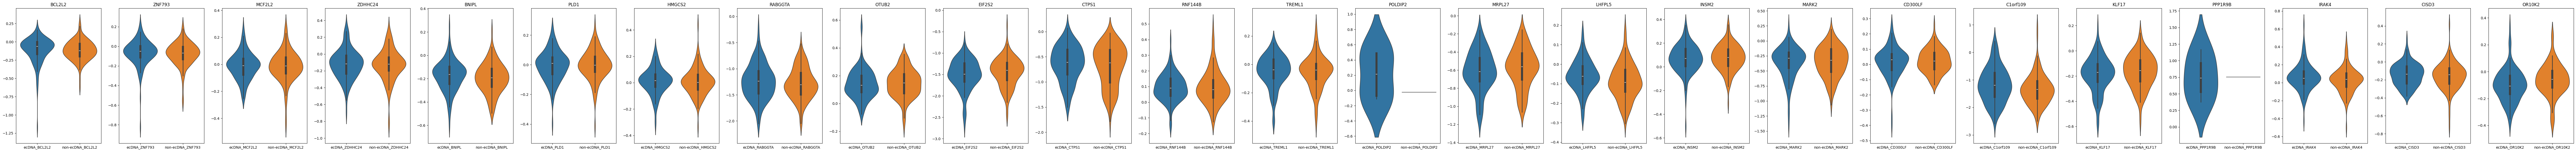

In [179]:
fig, axes = plt.subplots(nrows=1, ncols=len(common_genes[:25]), figsize=(4*len(common_genes[:25]), 6))

for i, gene in enumerate(common_genes[:25]):
    ax = axes[i]
    ecDNA_data = combined_df['ecDNA_' + gene]
    non_ecDNA_data = combined_df['non-ecDNA_' + gene]
    sns.violinplot(data=[ecDNA_data, non_ecDNA_data], ax=ax)
    ax.set_title(gene)

plt.tight_layout()
plt.show()

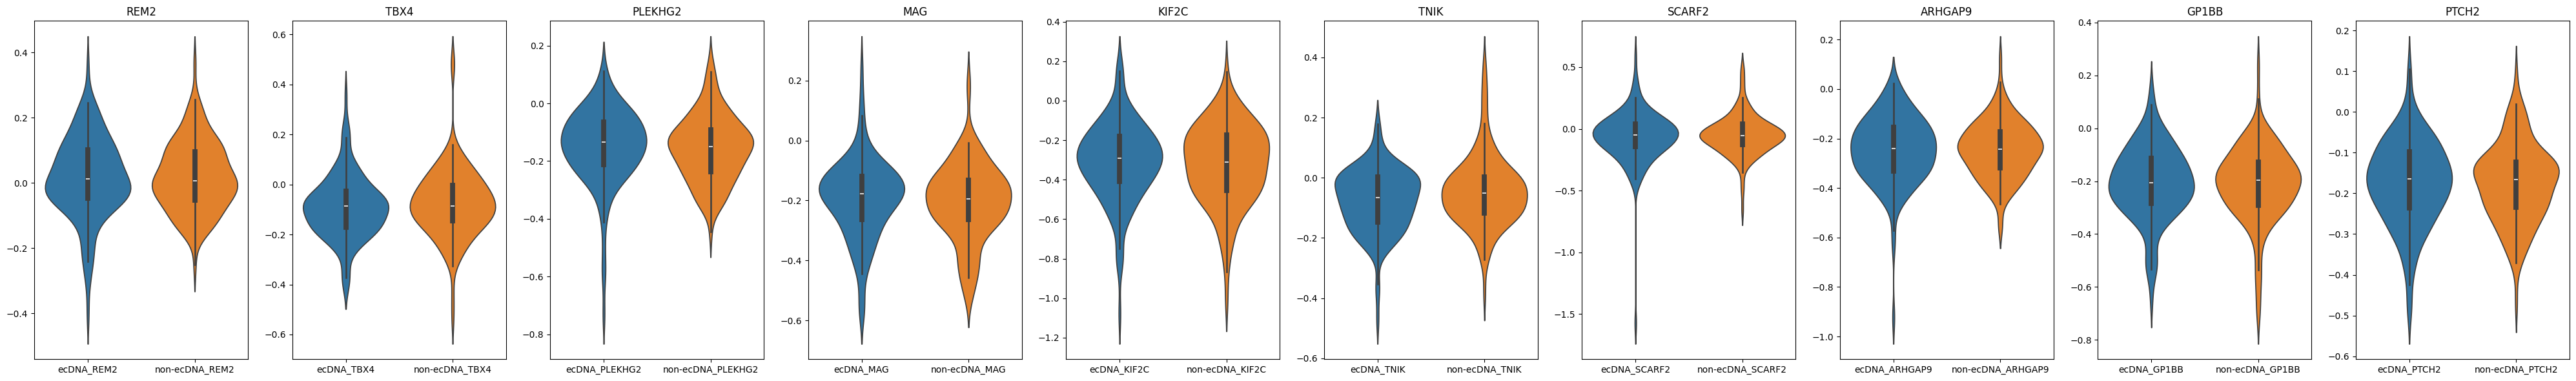

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
start = 510
end = 520

fig, axes = plt.subplots(nrows=1, ncols=len(common_genes[start:end]), figsize=(4*len(common_genes[start:end]), 6))

for i, gene in enumerate(common_genes[start:end]):
    ax = axes[i]
    ecDNA_data = combined_df['ecDNA_' + gene]
    non_ecDNA_data = combined_df['non-ecDNA_' + gene]
    sns.violinplot(data=[ecDNA_data, non_ecDNA_data], ax=ax)
    ax.set_title(gene)

plt.tight_layout()
plt.show()

## Statistical tests 

- unpaired t-test, sample size is large enough to perform t-test even if the data is non-normal. 

In [3]:
from scipy import stats

In [21]:
genes = [] # list to append genes
t_stats = [] # list to append t statistics for each gene (comparing means of scores for ecDNA + vs ecDNA -)
p_values = [] # list to append p-value for each gene (comparing means of scores for ecDNA + vs ecDNA -)
for i, gene in enumerate(common_genes):
    ecDNA_data = df_ecDNA[gene]
    non_ecDNA_data = df_non_ecDNA[gene]
    t, p = stats.ttest_ind(ecDNA_data, non_ecDNA_data)
    genes.append(gene)
    t_stats.append(t)
    p_values.append(p)


In [47]:
stats_data = {
    'genes': genes,
    't_stats': t_stats,
    'p_values': p_values
}

stats_data_df = pd.DataFrame(stats_data)

In [48]:
stats_data_df.to_csv('../Scores_compare_stats.csv', index = False)

In [49]:
print(len(stats_data_df))

1694


In [51]:
# remove NA values moving forward 
stats_data_df_cleaned = stats_data_df.dropna()

In [52]:
print(len(stats_data_df_cleaned))

1610


> 1610 genes evaluated, we need to perform multiple hypothesis correction to maintain the false positive rate at 5%


> bonferroni for now? 

In [59]:
stats_df_sig = stats_data_df_cleaned[stats_data_df_cleaned['p_values'] < 0.05]
stats_df_sig_bonferroni = stats_data_df_cleaned[stats_data_df_cleaned['p_values'] < (0.05/len(stats_data_df_cleaned)) ] # multiple hypothesis correction 

In [60]:
stats_df_sig

,genes,t_stats,p_values
3,MRPS12,-2.663281,0.008262
14,FBL,2.125937,0.034530
20,ERBB3,-2.784498,0.005789
24,ATP5F1B,-2.425893,0.016009
28,TIE1,-2.078363,0.038739
...,...,...,...
1646,NDUFS8,-2.760825,0.006211
1652,CRKL,-2.050381,0.041414
1655,SOX4,-2.011601,0.045380
1684,TFIP11,-2.271567,0.023999


> 145 genes have a p < 0.05 difference in the means of score distributions between ecDNA + and ecDNA - cell lines 

In [61]:
stats_df_sig_bonferroni

,genes,t_stats,p_values


> no bonferroni corrected significant genes :(

> any FDR<0.05 genes?

In [4]:
from statsmodels.stats.multitest import multipletests
import numpy as np

In [64]:
p_vals = stats_data_df_cleaned['p_values']
_, fdr_corrected_p_values, _, _ = multipletests(p_vals, alpha=0.05, method='fdr_bh')
stats_data_df_cleaned['fdr_corrected_p'] = fdr_corrected_p_values

C:\Users\kaiak\AppData\Local\Temp\ipykernel_9152\2171489370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_data_df_cleaned['fdr_corrected_p'] = fdr_corrected_p_values


In [66]:
stats_df_sig_fdr = stats_data_df_cleaned[stats_data_df_cleaned['fdr_corrected_p'] < 0.05]

In [67]:
stats_df_sig_fdr

,genes,t_stats,p_values,fdr_corrected_p
1410,TMEM199,4.079905,0.000061,0.049388
1558,CITED4,-4.115259,0.000053,0.049388


In [68]:
genes_interesting = stats_df_sig_fdr['genes']

> two genes with FDR < 0.05! 

## Plot these interesting examples 

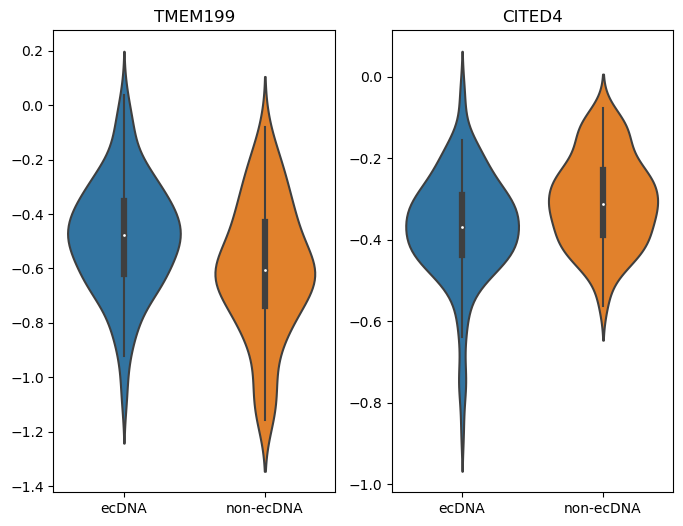

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=len(genes_interesting), figsize=(4*len(genes_interesting), 6))

for i, gene in enumerate(genes_interesting):
    ax = axes[i]
    ecDNA_data = df_ecDNA[gene]
    non_ecDNA_data = df_non_ecDNA[gene]
    sns.violinplot(data=[ecDNA_data, non_ecDNA_data], ax=ax)
    ax.set_title(gene)
    ax.set_xticklabels(['ecDNA', 'non-ecDNA'])

## Extension: Heritability of gene expression 

In [5]:
# read in stats results 
stats_data_df = pd.read_csv('../Scores_compare_stats.csv')
stats_data_df_cleaned = stats_data_df.dropna()
stats_df_sig = stats_data_df_cleaned[stats_data_df_cleaned['p_values'] < 0.05]

In [6]:
stats_df_sig

,genes,t_stats,p_values
3,MRPS12,-2.663281,0.008262
14,FBL,2.125937,0.034530
20,ERBB3,-2.784498,0.005789
24,ATP5F1B,-2.425893,0.016009
28,TIE1,-2.078363,0.038739
...,...,...,...
1646,NDUFS8,-2.760825,0.006211
1652,CRKL,-2.050381,0.041414
1655,SOX4,-2.011601,0.045380
1684,TFIP11,-2.271567,0.023999


In [7]:
heritabilities_tissues = pd.read_csv('../TISSUES_hsq.txt', delimiter = '\t')

In [8]:
heritabilities_tissues # NaN means that gene was not in the GTEx data 

,gene,Ovary_hsq,Ovary_hsq_se,Ovary_hsq.pv,Whole_Blood_hsq,Whole_Blood_hsq_se,Whole_Blood_hsq.pv,Thyroid_hsq,Thyroid_hsq_se,Thyroid_hsq.pv,...,Liver_hsq.pv,Uterus_hsq,Uterus_hsq_se,Uterus_hsq.pv,Esophagus_Muscularis_hsq,Esophagus_Muscularis_hsq_se,Esophagus_Muscularis_hsq.pv,Spleen_hsq,Spleen_hsq_se,Spleen_hsq.pv
0,ENSG00000000419,NaN,NaN,NaN,-0.005573,0.010259,3.629000e-01,0.058497,0.027008,0.022160,...,2.916000e-02,NaN,NaN,NaN,-0.003483,0.017245,4.450000e-01,0.001520,0.050689,4.914000e-01
1,ENSG00000000457,NaN,NaN,NaN,0.136313,0.030294,4.996000e-16,0.071048,0.024211,0.000006,...,3.118000e-01,NaN,NaN,NaN,0.092168,0.030768,4.368000e-06,0.268102,0.069941,2.693000e-07
2,ENSG00000000460,NaN,NaN,NaN,0.080525,0.024178,3.396000e-08,0.225855,0.041677,0.000000,...,4.577000e-10,NaN,NaN,NaN,0.136616,0.041105,3.347000e-06,-0.043516,0.000021,8.475000e-03
3,ENSG00000000938,NaN,NaN,NaN,0.014133,0.011752,1.210000e-01,0.014640,0.011700,0.114200,...,4.820000e-01,NaN,NaN,NaN,0.044390,0.026111,3.229000e-02,-0.053822,0.000257,3.429000e-02
4,ENSG00000000971,NaN,NaN,NaN,-0.005232,0.003622,2.431000e-01,0.064096,0.026104,0.000001,...,3.035000e-01,NaN,NaN,NaN,0.117243,0.037201,1.789000e-08,-0.021593,0.010134,1.886000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31447,ENSG00000284540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.612000e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31448,ENSG00000284543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009447,0.039352,4.255000e-01
31449,ENSG00000284552,NaN,NaN,NaN,-0.006751,0.011095,3.497000e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084522,0.063390,1.252000e-01
31450,ENSG00000284574,NaN,NaN,NaN,-0.002544,0.006191,4.023000e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# read in gene symbol conversion   
gene_ids_mapping = pd.read_csv('../gene_id_mapping.txt', delimiter = '\t')

In [10]:
gene_ids_mapping

,ensembl_gene_id,hgnc_symbol
0,ENSG00000000419,DPM1
1,ENSG00000000457,SCYL3
2,ENSG00000000460,FIRRM
3,ENSG00000000938,FGR
4,ENSG00000000971,CFH
...,...,...
30975,ENSG00000284526,NaN
30976,ENSG00000284540,NaN
30977,ENSG00000284543,LINC01226
30978,ENSG00000284574,MIR6787


In [11]:
gene_ids_mapping.rename(columns={'ensembl_gene_id': 'gene', 'hgnc_symbol': 'symbol'}, inplace=True)

In [12]:
heritabilities_tissues_rename = pd.merge(gene_ids_mapping, heritabilities_tissues, on='gene', how = 'outer')

In [13]:
heritabilities_tissues_rename

,gene,symbol,Ovary_hsq,Ovary_hsq_se,Ovary_hsq.pv,Whole_Blood_hsq,Whole_Blood_hsq_se,Whole_Blood_hsq.pv,Thyroid_hsq,Thyroid_hsq_se,...,Liver_hsq.pv,Uterus_hsq,Uterus_hsq_se,Uterus_hsq.pv,Esophagus_Muscularis_hsq,Esophagus_Muscularis_hsq_se,Esophagus_Muscularis_hsq.pv,Spleen_hsq,Spleen_hsq_se,Spleen_hsq.pv
0,ENSG00000000419,DPM1,NaN,NaN,NaN,-0.005573,0.010259,3.629000e-01,0.058497,0.027008,...,2.916000e-02,NaN,NaN,NaN,-0.003483,0.017245,4.450000e-01,0.001520,0.050689,4.914000e-01
1,ENSG00000000457,SCYL3,NaN,NaN,NaN,0.136313,0.030294,4.996000e-16,0.071048,0.024211,...,3.118000e-01,NaN,NaN,NaN,0.092168,0.030768,4.368000e-06,0.268102,0.069941,2.693000e-07
2,ENSG00000000460,FIRRM,NaN,NaN,NaN,0.080525,0.024178,3.396000e-08,0.225855,0.041677,...,4.577000e-10,NaN,NaN,NaN,0.136616,0.041105,3.347000e-06,-0.043516,0.000021,8.475000e-03
3,ENSG00000000938,FGR,NaN,NaN,NaN,0.014133,0.011752,1.210000e-01,0.014640,0.011700,...,4.820000e-01,NaN,NaN,NaN,0.044390,0.026111,3.229000e-02,-0.053822,0.000257,3.429000e-02
4,ENSG00000000971,CFH,NaN,NaN,NaN,-0.005232,0.003622,2.431000e-01,0.064096,0.026104,...,3.035000e-01,NaN,NaN,NaN,0.117243,0.037201,1.789000e-08,-0.021593,0.010134,1.886000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31449,ENSG00000283073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079158,0.031450,...,NaN,NaN,NaN,NaN,0.059661,0.028855,3.039000e-02,NaN,NaN,NaN
31450,ENSG00000283328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31451,ENSG00000284413,NaN,NaN,NaN,NaN,-0.006809,0.005073,2.585000e-01,-0.004921,0.007650,...,3.439000e-02,NaN,NaN,NaN,0.014653,0.015669,1.948000e-01,0.097590,0.060482,7.409000e-02
31452,ENSG00000284486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013001,0.029643,3.872000e-01


In [14]:
heritabilities_tissues_rename.to_csv("../heritabilities_tissues_rename.txt", index = False)

### Initial analysis on correlation of heritability values across tissues 

In [15]:
columns = heritabilities_tissues_rename.columns
selected_columns = [columns[0], columns[1]] + list(columns[2::3])
selected_columns

['gene',
 'symbol',
 'Ovary_hsq',
 'Whole_Blood_hsq',
 'Thyroid_hsq',
 'Lung_hsq',
 'Stomach_hsq',
 'Breast_Mammary_Tissue_hsq',
 'Kidney_Cortex_hsq',
 'Colon_Transverse_hsq',
 'Small_Intestine_Terminal_Ileum_hsq',
 'Pancreas_hsq',
 'Nerve_Tibial_hsq',
 'Prostate_hsq',
 'Skin_Sun_Exposed_Lower_leg_hsq',
 'Liver_hsq',
 'Uterus_hsq',
 'Esophagus_Muscularis_hsq',
 'Spleen_hsq']

In [16]:
heritabilities_tissues_hsqonly = heritabilities_tissues_rename[selected_columns]
heritabilities_tissues_hsqonly.dropna(axis=1, how ='all', inplace = True)
heritabilities_tissues_hsqonly_cleaned = heritabilities_tissues_hsqonly.dropna()
heritabilities_tissues_hsqonly_cleaned

C:\Users\kaiak\AppData\Local\Temp\ipykernel_10960\2316564758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heritabilities_tissues_hsqonly.dropna(axis=1, how ='all', inplace = True)


,gene,symbol,Whole_Blood_hsq,Thyroid_hsq,Lung_hsq,Stomach_hsq,Breast_Mammary_Tissue_hsq,Kidney_Cortex_hsq,Colon_Transverse_hsq,Small_Intestine_Terminal_Ileum_hsq,Pancreas_hsq,Nerve_Tibial_hsq,Skin_Sun_Exposed_Lower_leg_hsq,Liver_hsq,Esophagus_Muscularis_hsq,Spleen_hsq
0,ENSG00000000419,DPM1,-0.005573,0.058497,0.036340,0.003194,0.013509,-0.350319,0.023874,-0.111234,-0.045246,0.080693,0.021930,-0.091321,-0.003483,0.001520
1,ENSG00000000457,SCYL3,0.136313,0.071048,-0.000226,-0.014639,0.103879,0.360638,0.030450,0.169282,0.066946,0.095651,0.071140,0.027162,0.092168,0.268102
3,ENSG00000000938,FGR,0.014133,0.014640,0.010482,0.030798,-0.009155,0.070388,0.058433,0.002220,-0.007939,0.054527,0.003214,0.001672,0.044390,-0.053822
6,ENSG00000001084,GCLC,0.045253,0.061138,0.014740,0.041739,0.008644,-0.034630,0.037546,0.175002,0.199120,0.317270,0.070094,0.009412,0.018166,0.628352
7,ENSG00000001167,NFYA,0.001268,0.405825,0.163059,0.159739,0.234041,0.072672,0.294342,0.382325,0.371203,0.286767,0.148683,0.111812,0.110165,0.309186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30915,ENSG00000283646,LINC02009,0.054212,0.086802,0.019667,0.037548,0.060161,0.348004,0.083983,0.035935,0.224105,0.025345,0.019056,0.006020,0.140519,0.048917
30926,ENSG00000283709,FAM238C,0.027140,0.162965,0.069428,0.221698,0.067420,-0.013066,0.101896,0.103926,0.075130,0.292472,0.020493,0.054164,0.135977,0.150338
30930,ENSG00000283787,PRR33,0.018399,0.025153,0.089397,-0.028634,0.033893,0.003261,0.093097,-0.039761,0.018575,0.072925,0.019926,0.044444,-0.005467,0.023521
30954,ENSG00000284128,BCRP3,0.002961,0.105866,0.171341,-0.024792,-0.024775,-0.100602,-0.033523,0.139205,0.141502,-0.002898,-0.009085,0.115137,-0.011290,0.023643


In [17]:
len(heritabilities_tissues_hsqonly_cleaned)

9341

In [18]:
pre_corr = heritabilities_tissues_hsqonly_cleaned[heritabilities_tissues_hsqonly_cleaned.columns[2:]]

In [19]:
corr_matrix = pre_corr.corr()

In [20]:
corr_matrix

,Whole_Blood_hsq,Thyroid_hsq,Lung_hsq,Stomach_hsq,Breast_Mammary_Tissue_hsq,Kidney_Cortex_hsq,Colon_Transverse_hsq,Small_Intestine_Terminal_Ileum_hsq,Pancreas_hsq,Nerve_Tibial_hsq,Skin_Sun_Exposed_Lower_leg_hsq,Liver_hsq,Esophagus_Muscularis_hsq,Spleen_hsq
Whole_Blood_hsq,1.000000,0.515626,0.634705,0.534457,0.550295,0.261621,0.546612,0.504517,0.486766,0.521730,0.539369,0.451409,0.524147,0.627682
Thyroid_hsq,0.515626,1.000000,0.771046,0.734024,0.759937,0.378296,0.741267,0.638262,0.686132,0.755569,0.710037,0.554849,0.746692,0.663120
Lung_hsq,0.634705,0.771046,1.000000,0.775401,0.806986,0.372366,0.786022,0.684605,0.686980,0.764888,0.736780,0.602242,0.775751,0.727876
Stomach_hsq,0.534457,0.734024,0.775401,1.000000,0.786475,0.387539,0.812499,0.694794,0.734382,0.726825,0.725923,0.613637,0.770846,0.669069
Breast_Mammary_Tissue_hsq,0.550295,0.759937,0.806986,0.786475,1.000000,0.377979,0.793019,0.678719,0.680340,0.802186,0.768545,0.588325,0.803630,0.684064
Kidney_Cortex_hsq,0.261621,0.378296,0.372366,0.387539,0.377979,1.000000,0.382866,0.351647,0.358718,0.357556,0.339619,0.332096,0.359665,0.337096
Colon_Transverse_hsq,0.546612,0.741267,0.786022,0.812499,0.793019,0.382866,1.000000,0.729722,0.693862,0.746470,0.728833,0.603589,0.796540,0.691977
Small_Intestine_Terminal_Ileum_hsq,0.504517,0.638262,0.684605,0.694794,0.678719,0.351647,0.729722,1.000000,0.600557,0.634171,0.614898,0.538754,0.647869,0.656080
Pancreas_hsq,0.486766,0.686132,0.686980,0.734382,0.680340,0.358718,0.693862,0.600557,1.000000,0.656556,0.652291,0.568149,0.668244,0.592153
Nerve_Tibial_hsq,0.521730,0.755569,0.764888,0.726825,0.802186,0.357556,0.746470,0.634171,0.656556,1.000000,0.735158,0.534547,0.801847,0.651879


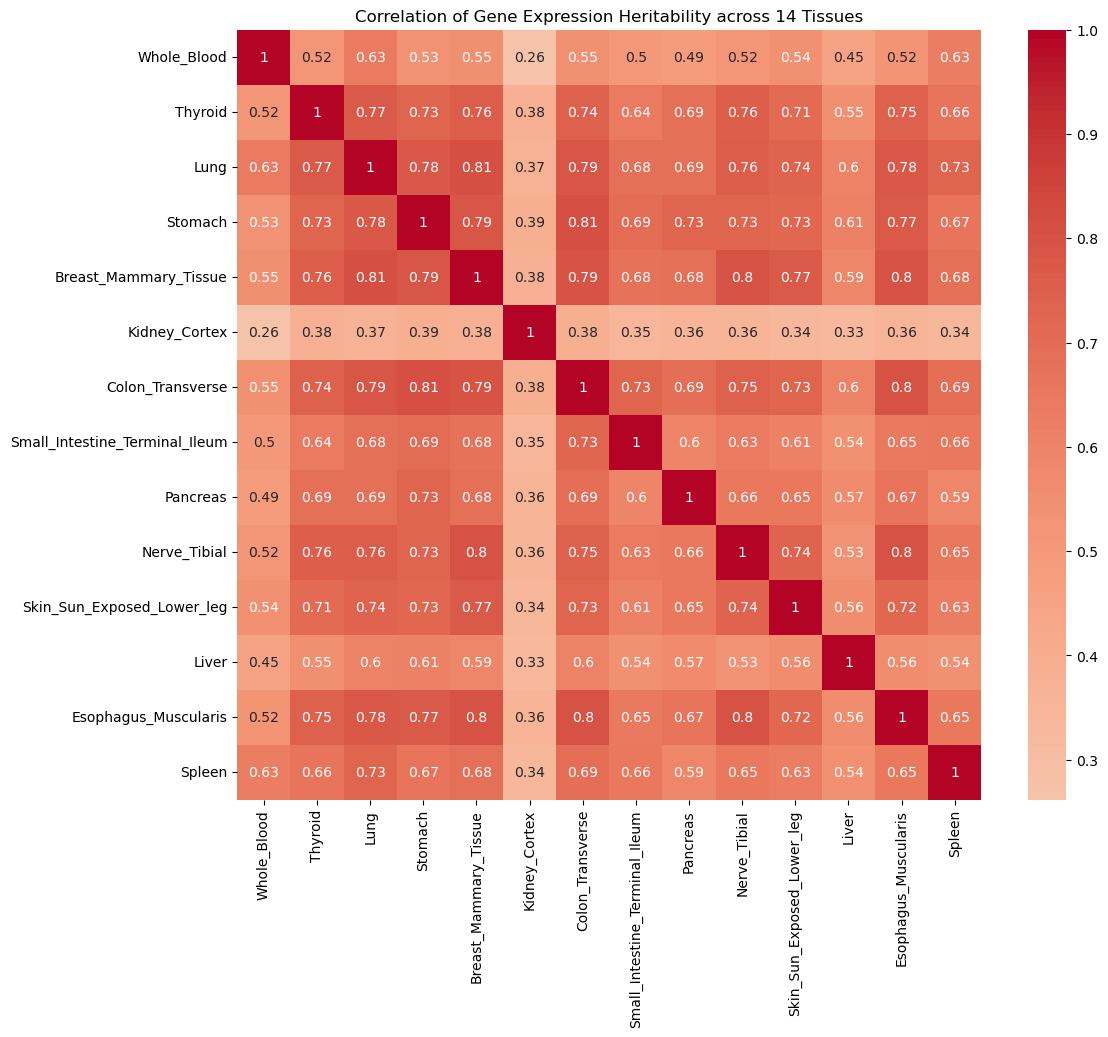

In [21]:
corr_matrix.columns = [col.replace('_hsq', '') for col in corr_matrix.columns]
corr_matrix.index = [idx.replace('_hsq', '') for idx in corr_matrix.index]
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Gene Expression Heritability across 14 Tissues')
plt.show()

### Some thoughts 
- Our results suggest that the genetic architecture of gene expression in Kidney is the least correlated with other tissues. However, this may be a function of the sample size in GTEx, as we only had about 70 individuals. The small sample size may result in a noisy heritaibility estimate, leading to low correlation with other tissues 
- Breast and Lung are highly correlated, r = 0.81 -> proximity of tissues? 
- Colon is highly correlated with Stomach (makes sense biologically?)

> Although the genetic regulation of gene expression is certainly different for cancer cells, this gives us some insight on the similarities/differences of gene expression heritaibility across tissues. For example, the high correlation between the heritability estimates in Colon and Stomach gene expression suggests that the genetic architecture of gene expression in colon and stomach cancer cell lines may also be similar. 

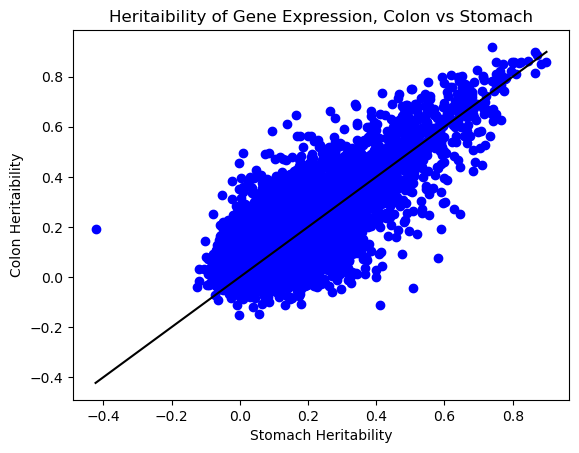

In [22]:
stomach = pre_corr['Stomach_hsq']
colon = pre_corr['Colon_Transverse_hsq']
plt.plot(stomach, colon, 'o', color='blue')
plt.xlabel('Stomach Heritability')
plt.ylabel('Colon Heritaibility')
plt.title('Heritaibility of Gene Expression, Colon vs Stomach')
x_line = np.linspace(min(stomach), max(stomach), 100)
y_line = x_line  # y = x for a slope of 1 and intercept 0
plt.plot(x_line, y_line, color='black', linestyle='-')
plt.show()

> Something interesting here are some of these 'outliers'. These genes are strongly regulated by genetics in one tissue but not the other... pretty cool to think about....or is it just noise?

### Investigating the heritaibilites of the interesting genes that are critical specifically in ecDNA + cell lines 

In [23]:
heritabilities_tissues_rename # matrix of heritabilities of genes across tissues

,gene,symbol,Ovary_hsq,Ovary_hsq_se,Ovary_hsq.pv,Whole_Blood_hsq,Whole_Blood_hsq_se,Whole_Blood_hsq.pv,Thyroid_hsq,Thyroid_hsq_se,...,Liver_hsq.pv,Uterus_hsq,Uterus_hsq_se,Uterus_hsq.pv,Esophagus_Muscularis_hsq,Esophagus_Muscularis_hsq_se,Esophagus_Muscularis_hsq.pv,Spleen_hsq,Spleen_hsq_se,Spleen_hsq.pv
0,ENSG00000000419,DPM1,NaN,NaN,NaN,-0.005573,0.010259,3.629000e-01,0.058497,0.027008,...,2.916000e-02,NaN,NaN,NaN,-0.003483,0.017245,4.450000e-01,0.001520,0.050689,4.914000e-01
1,ENSG00000000457,SCYL3,NaN,NaN,NaN,0.136313,0.030294,4.996000e-16,0.071048,0.024211,...,3.118000e-01,NaN,NaN,NaN,0.092168,0.030768,4.368000e-06,0.268102,0.069941,2.693000e-07
2,ENSG00000000460,FIRRM,NaN,NaN,NaN,0.080525,0.024178,3.396000e-08,0.225855,0.041677,...,4.577000e-10,NaN,NaN,NaN,0.136616,0.041105,3.347000e-06,-0.043516,0.000021,8.475000e-03
3,ENSG00000000938,FGR,NaN,NaN,NaN,0.014133,0.011752,1.210000e-01,0.014640,0.011700,...,4.820000e-01,NaN,NaN,NaN,0.044390,0.026111,3.229000e-02,-0.053822,0.000257,3.429000e-02
4,ENSG00000000971,CFH,NaN,NaN,NaN,-0.005232,0.003622,2.431000e-01,0.064096,0.026104,...,3.035000e-01,NaN,NaN,NaN,0.117243,0.037201,1.789000e-08,-0.021593,0.010134,1.886000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31449,ENSG00000283073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079158,0.031450,...,NaN,NaN,NaN,NaN,0.059661,0.028855,3.039000e-02,NaN,NaN,NaN
31450,ENSG00000283328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31451,ENSG00000284413,NaN,NaN,NaN,NaN,-0.006809,0.005073,2.585000e-01,-0.004921,0.007650,...,3.439000e-02,NaN,NaN,NaN,0.014653,0.015669,1.948000e-01,0.097590,0.060482,7.409000e-02
31452,ENSG00000284486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013001,0.029643,3.872000e-01


In [24]:
stats_df_sig # table of interesting genes 
genes_interesting = stats_df_sig['genes']

In [25]:
filtered_hsq_interesting = heritabilities_tissues_rename[heritabilities_tissues_rename['symbol'].isin(genes_interesting)]

In [26]:
filtered_hsq_interesting

,gene,symbol,Ovary_hsq,Ovary_hsq_se,Ovary_hsq.pv,Whole_Blood_hsq,Whole_Blood_hsq_se,Whole_Blood_hsq.pv,Thyroid_hsq,Thyroid_hsq_se,...,Liver_hsq.pv,Uterus_hsq,Uterus_hsq_se,Uterus_hsq.pv,Esophagus_Muscularis_hsq,Esophagus_Muscularis_hsq_se,Esophagus_Muscularis_hsq.pv,Spleen_hsq,Spleen_hsq_se,Spleen_hsq.pv
399,ENSG00000023909,GCLM,NaN,NaN,NaN,0.019174,0.012547,6.687000e-02,0.154004,0.044221,...,0.043000,NaN,NaN,NaN,0.077633,0.029545,2.444000e-04,0.051766,0.040502,1.198000e-01
400,ENSG00000024048,UBR2,NaN,NaN,NaN,-0.016629,0.004618,1.591000e-01,0.080085,0.029146,...,NaN,NaN,NaN,NaN,0.159008,0.036117,1.101000e-08,-0.033493,0.026545,2.426000e-01
417,ENSG00000026508,CD44,NaN,NaN,NaN,0.067563,0.023563,6.240000e-04,0.042288,0.024164,...,NaN,NaN,NaN,NaN,0.048953,0.032834,9.633000e-02,0.060255,0.043341,1.051000e-01
501,ENSG00000037897,METTL1,NaN,NaN,NaN,-0.008274,0.000534,1.155000e-01,0.194204,0.039454,...,0.344000,NaN,NaN,NaN,-0.009893,0.003395,1.950000e-01,-0.027048,0.002299,1.650000e-01
556,ENSG00000043514,TRIT1,NaN,NaN,NaN,0.285347,0.040862,0.000000e+00,0.361393,0.049939,...,0.000062,NaN,NaN,NaN,0.550490,0.046972,0.000000e+00,0.526359,0.068577,6.740000e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,ENSG00000214530,STARD10,NaN,NaN,NaN,0.182102,0.033205,0.000000e+00,0.147247,0.038231,...,0.000012,NaN,NaN,NaN,0.241606,0.042868,0.000000e+00,0.343050,0.075121,1.030000e-08
17900,ENSG00000219438,TAFA5,NaN,NaN,NaN,NaN,NaN,NaN,0.153915,0.035767,...,0.086610,NaN,NaN,NaN,-0.037815,0.036054,2.630000e-01,0.052400,0.049367,1.998000e-01
22831,ENSG00000244045,TMEM199,NaN,NaN,NaN,0.088107,0.022850,1.103000e-11,0.120100,0.033494,...,0.005206,NaN,NaN,NaN,0.115549,0.035020,2.863000e-06,0.108355,0.057052,2.389000e-02
24686,ENSG00000254901,BORCS8,NaN,NaN,NaN,0.036204,0.020974,3.626000e-02,0.208640,0.041801,...,0.115100,NaN,NaN,NaN,0.157121,0.051012,9.771000e-06,0.180127,0.070599,7.706000e-03


In [27]:
filtered_hsq_interesting.dropna(axis=1, how ='all', inplace = True)

C:\Users\kaiak\AppData\Local\Temp\ipykernel_10960\1979808824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hsq_interesting.dropna(axis=1, how ='all', inplace = True)


In [28]:
columns = filtered_hsq_interesting.columns
selected_columns = list(columns[2::3])
tissues = [col.replace('_hsq', '') for col in selected_columns]
sig_heritable_df = pd.DataFrame({'symbol': filtered_hsq_interesting['symbol']})
sig_heritable_df

,symbol
399,GCLM
400,UBR2
417,CD44
501,METTL1
556,TRIT1
...,...
17557,STARD10
17900,TAFA5
22831,TMEM199
24686,BORCS8


In [29]:
import math
for tissue in tissues:
        significantly_heritable = []
        genes = []
        for index, row in filtered_hsq_interesting.iterrows():
            genes.append(row['symbol'])
            if not math.isnan(row[tissue+'_hsq']):
                if row[tissue+'_hsq'] > 0 and row[tissue+'_hsq.pv'] < 0.01:
                    significantly_heritable.append(True)
                else:
                    significantly_heritable.append(False)
            else:
                significantly_heritable.append(False)
        df_add = pd.DataFrame({'symbol': genes, tissue: significantly_heritable})
        sig_heritable_df = pd.merge(sig_heritable_df, df_add, on='symbol', how='outer')

In [30]:
sig_heritable_df.set_index('symbol', inplace=True)
sig_heritable_df # True = significantly heritable in that tissue 

,Whole_Blood,Thyroid,Lung,Stomach,Breast_Mammary_Tissue,Kidney_Cortex,Colon_Transverse,Small_Intestine_Terminal_Ileum,Pancreas,Nerve_Tibial,Skin_Sun_Exposed_Lower_leg,Liver,Esophagus_Muscularis,Spleen
symbol,,,,,,,,,,,,,,
GCLM,False,True,False,True,False,False,False,False,True,True,True,False,True,False
UBR2,False,True,False,False,False,False,False,False,False,True,False,False,True,False
CD44,True,False,False,False,False,False,False,False,True,True,False,False,False,False
METTL1,False,True,False,False,False,False,False,False,False,False,False,False,False,False
TRIT1,True,True,True,True,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STARD10,True,True,False,True,True,False,False,False,False,True,True,True,True,True
TAFA5,False,True,False,False,False,False,False,False,False,True,True,False,False,False
TMEM199,True,True,True,True,True,False,True,False,False,True,True,True,True,False


In [31]:
sig_heritable_df['sum'] = sig_heritable_df.sum(axis=1)
sig_heritable_df_sorted = sig_heritable_df.sort_values(by='sum', ascending=False)
top_10_genes = sig_heritable_df_sorted.head(10)
top_10_genes.drop(columns='sum', inplace = True)

C:\Users\kaiak\AppData\Local\Temp\ipykernel_10960\1822891883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_genes.drop(columns='sum', inplace = True)


In [32]:
top_10_genes

,Whole_Blood,Thyroid,Lung,Stomach,Breast_Mammary_Tissue,Kidney_Cortex,Colon_Transverse,Small_Intestine_Terminal_Ileum,Pancreas,Nerve_Tibial,Skin_Sun_Exposed_Lower_leg,Liver,Esophagus_Muscularis,Spleen
symbol,,,,,,,,,,,,,,
MAP3K10,True,True,True,True,True,True,True,True,True,True,True,True,True,True
TIMM10,True,True,True,True,True,True,True,True,True,True,True,True,True,True
SF3A3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
NDUFS5,True,True,True,True,True,False,True,True,True,True,True,True,True,True
TRIT1,True,True,True,True,True,False,True,True,True,True,True,True,True,True
VPS28,True,True,True,True,True,False,True,True,True,True,True,True,True,True
PRPSAP1,True,True,True,True,True,True,True,True,True,True,True,False,True,True
DHRS4L2,True,True,True,True,True,True,False,False,True,True,True,True,True,True
ASNS,True,True,True,True,True,False,True,True,False,True,True,True,True,True


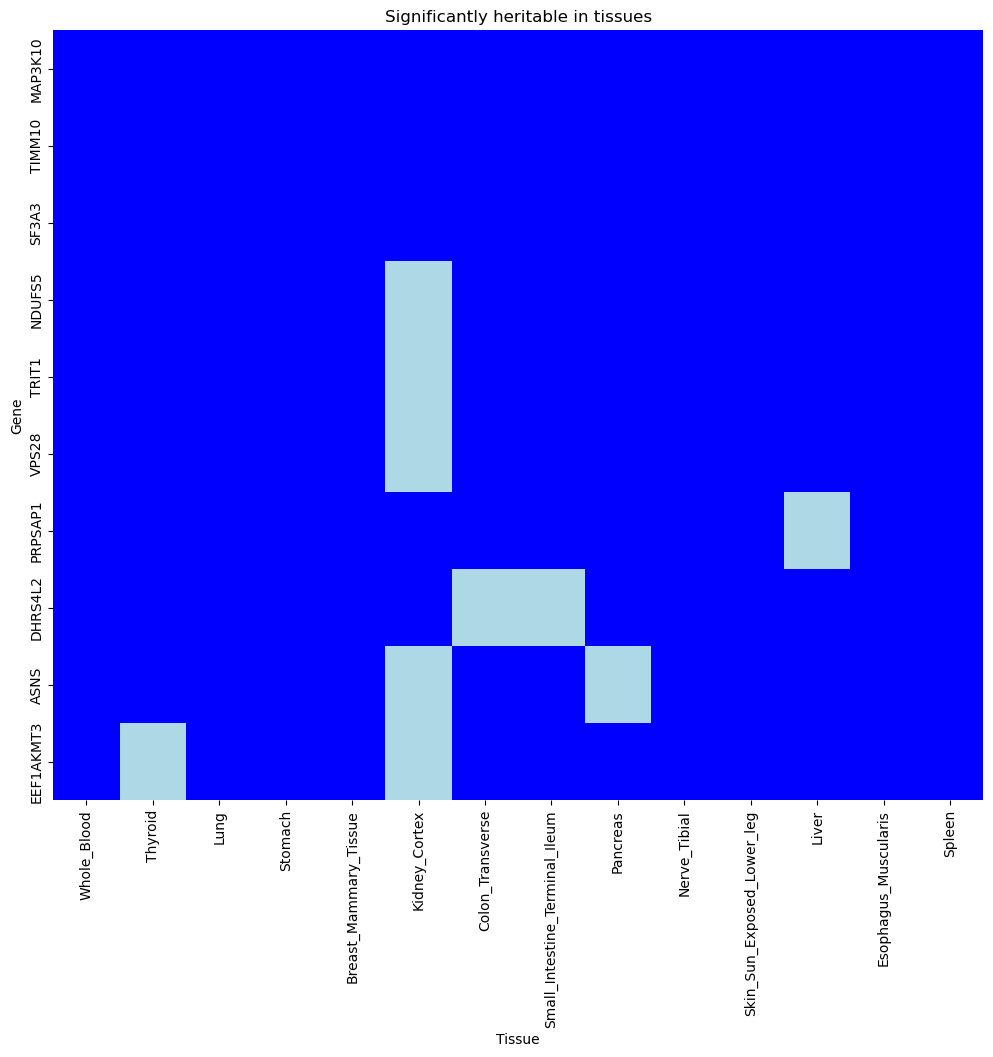

In [33]:
df_numeric = top_10_genes.astype(int)
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric, cmap=['lightblue', 'blue'], cbar=False)
plt.xlabel('Tissue')
plt.ylabel('Gene')
plt.title('Significantly heritable in tissues')
plt.show()

In [36]:
specific_10_genes = sig_heritable_df_sorted[sig_heritable_df_sorted['sum'] != 0].tail(10)
specific_10_genes.drop(columns='sum', inplace = True)
specific_10_genes

,Whole_Blood,Thyroid,Lung,Stomach,Breast_Mammary_Tissue,Kidney_Cortex,Colon_Transverse,Small_Intestine_Terminal_Ileum,Pancreas,Nerve_Tibial,Skin_Sun_Exposed_Lower_leg,Liver,Esophagus_Muscularis,Spleen
symbol,,,,,,,,,,,,,,
CRNN,False,False,False,False,False,False,False,False,False,False,True,False,False,False
UBXN7,True,False,False,False,False,False,False,False,False,False,False,False,False,False
TNIK,False,False,False,False,False,False,False,False,False,False,False,False,False,True
LMNTD1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
RPL22L1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
TINF2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
SERPINA12,False,False,False,False,False,False,False,False,False,False,True,False,False,False
HECTD1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
BRD1,True,False,False,False,False,False,False,False,False,False,False,False,False,False


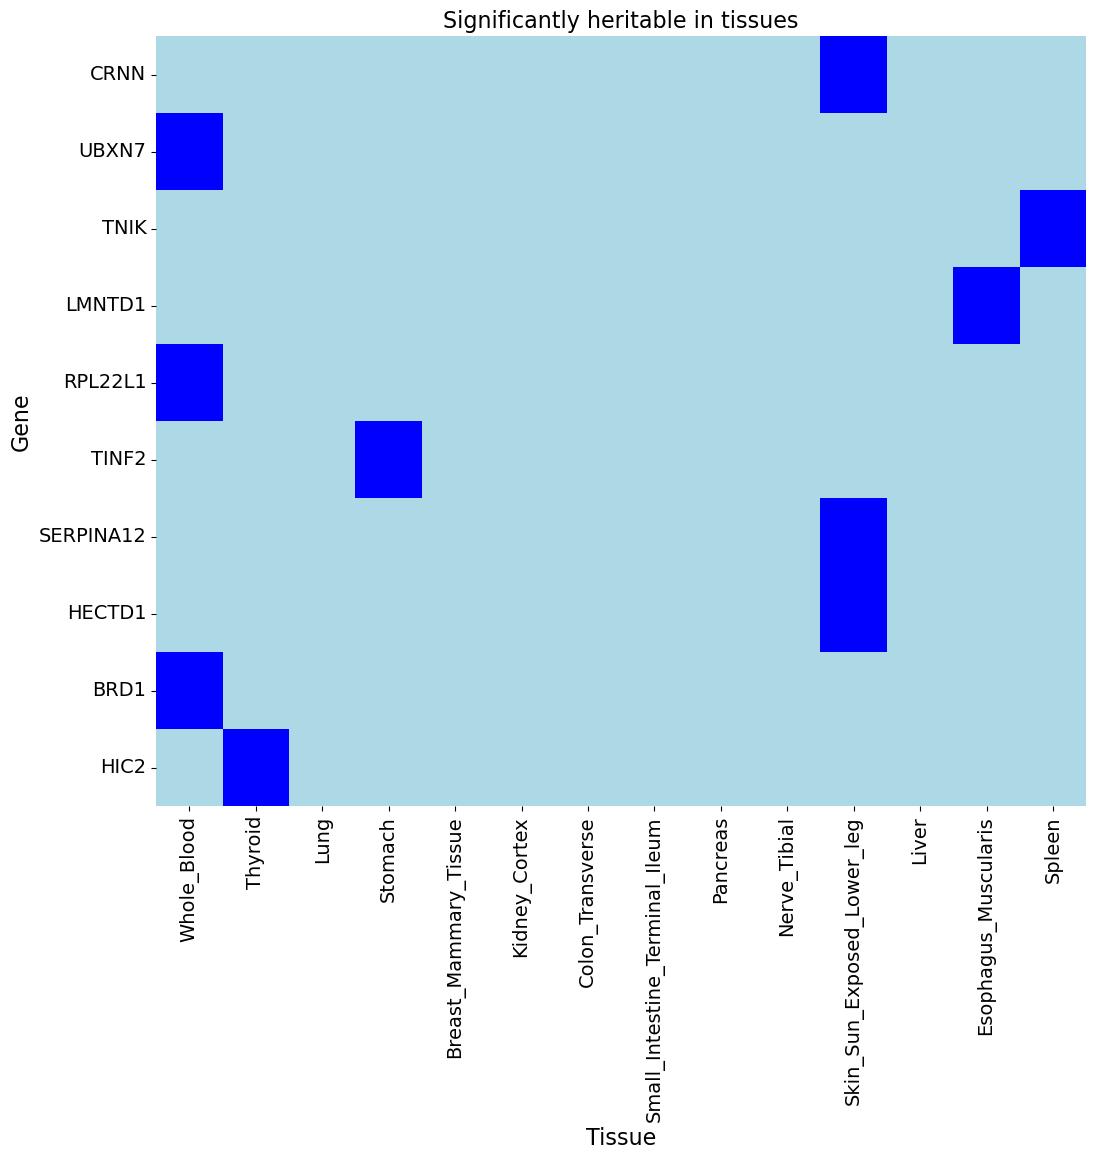

In [46]:
df_numeric = specific_10_genes.astype(int)
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric, cmap=['lightblue', 'blue'], cbar=False)
plt.xlabel('Tissue', fontsize=16)
plt.ylabel('Gene', fontsize=16)
plt.title('Significantly heritable in tissues', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation = 0)
plt.savefig('../tissue_specific_genes.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
columns = filtered_hsq_interesting.columns
selected_columns = [columns[1]] + list(columns[2::3])
filtered_hsq_interesting_df = filtered_hsq_interesting[selected_columns]
filtered_hsq_interesting_df.set_index('symbol', inplace=True)
top_10_genes_index = top_10_genes.index
filtered_hsq_interesting_df_top10 = filtered_hsq_interesting_df.loc[top_10_genes_index]

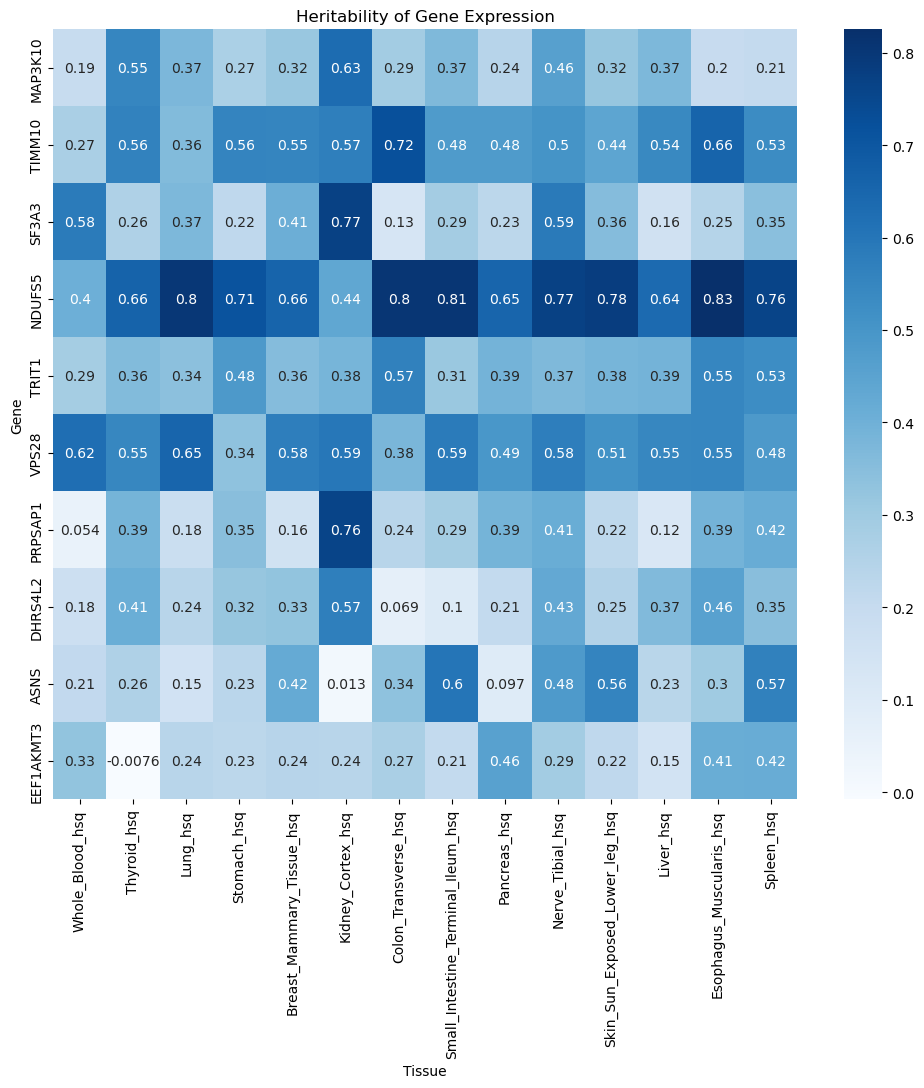

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_hsq_interesting_df_top10, cmap='Blues', annot = True)
plt.xlabel('Tissue')
plt.ylabel('Gene')
plt.title('Heritability of Gene Expression')
plt.show()

- https://www.nature.com/articles/s41467-023-39136-7
- genetic risk for cancer, pleiotropic associations

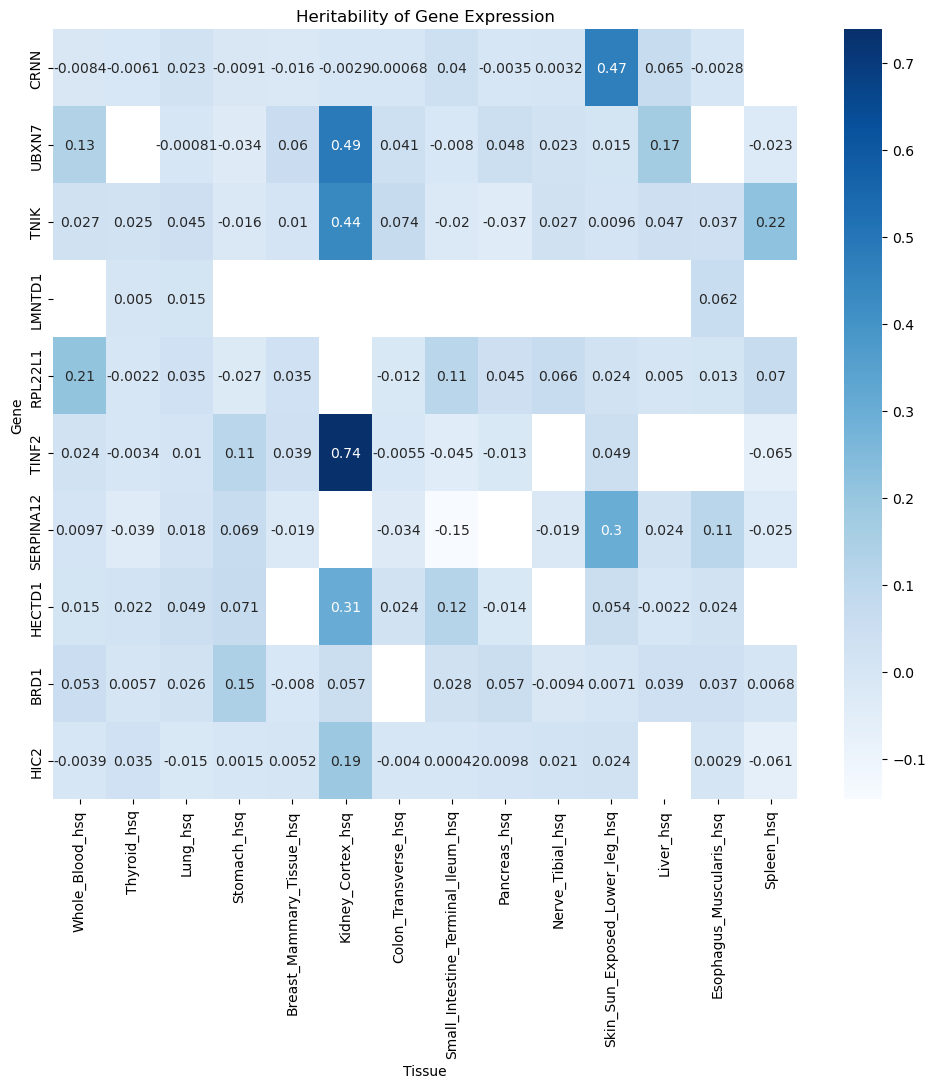

In [39]:
specific_10_genes_index = specific_10_genes.index
filtered_hsq_interesting_df_specific10 = filtered_hsq_interesting_df.loc[specific_10_genes_index]
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_hsq_interesting_df_specific10, cmap='Blues', annot = True)
plt.xlabel('Tissue')
plt.ylabel('Gene')
plt.title('Heritability of Gene Expression')
plt.show()

### Interesting? 

> CITED4 is a gene that is specifically critical in ecDNA + cancer cell lines. It is significantly heritable in whole blood, thyroid, lung, pancreas, skin, and spleen. This suggests that it can potentially carry genetic risk for specific cancer types, but not others. 

In [51]:
CITED4_heritabilities_boolean = sig_heritable_df[sig_heritable_df.index == "CITED4"]
CITED4_heritabilities_boolean.drop(columns='sum', inplace = True)

C:\Users\kaiak\AppData\Local\Temp\ipykernel_2676\2606448767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CITED4_heritabilities_boolean.drop(columns='sum', inplace = True)


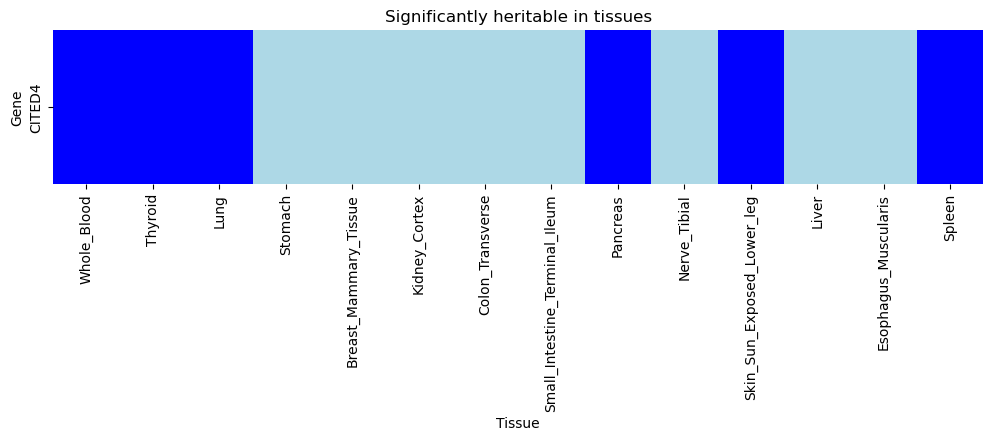

In [57]:
df_numeric = CITED4_heritabilities_boolean.astype(int)
plt.figure(figsize=(12, 2))
sns.heatmap(df_numeric, cmap=['lightblue', 'blue'], cbar=False)
plt.xlabel('Tissue')
plt.ylabel('Gene')
plt.title('Significantly heritable in tissues')
plt.show()

In [58]:
filtered_hsq_interesting_df_CITED4 = filtered_hsq_interesting_df[filtered_hsq_interesting_df.index == 'CITED4']

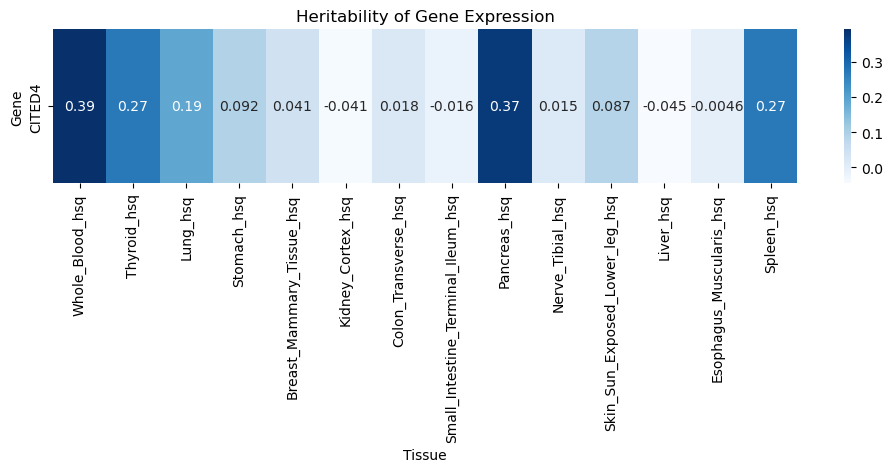

In [59]:
plt.figure(figsize=(12, 2))
sns.heatmap(filtered_hsq_interesting_df_CITED4, cmap='Blues', annot = True)
plt.xlabel('Tissue')
plt.ylabel('Gene')
plt.title('Heritability of Gene Expression')
plt.show()